# K - Nearest Neighbors from scratch

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

In [159]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

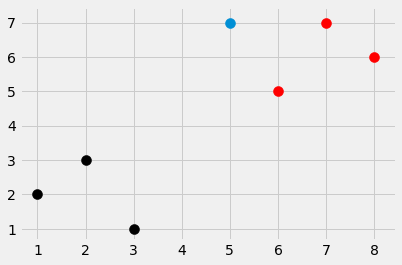

In [160]:
def graph(data,predict,k = 3):
    for i in data:
        for ii in data[i]:
            plt.scatter(ii[0],ii[1],s = 100,color = i)
    plt.scatter(new_features[0],new_features[1],s = 100)
            
graph(dataset,new_features)

In [161]:
def k_nearest_neighbors(data,predict,k = 3):
    distances = []
    for group in data:
        for feature in data[group]:
            dist = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append([dist,group])
    votes = [i[1] for i in sorted(distances)[:3]]
    vote_result = Counter(votes).most_common(1)[0][0]
    print('The given prediction belongs to: '+str(vote_result) + ' group')    

    
d = k_nearest_neighbors(dataset,new_features)

The given prediction belongs to: r group


## Testing our own algorithm

In [162]:
import pandas as pd
import random

In [163]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()
full_data[1]

[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0]

#### Creating training and testing set

In [164]:
random.shuffle(full_data)
train_set = {2:[], 4:[]}
test_set  = {2:[], 4:[]}
test_size = 0.2
train_data = full_data[:-int(len(full_data)*test_size)]
test_data = full_data[int(len(full_data)*test_size):]

In [165]:
for i in train_data:
    if i[-1]==2:
        train_set[2].append(i[:-1])
    else:
        train_set[4].append(i[:-1])

for i in test_data:
    if i[-1]==2:
        test_set[2].append(i[:-1])
    else:
        test_set[4].append(i[:-1])

In [166]:
len(train_set[2]),len(train_set[4])

(368, 192)

In [167]:
new_features  = [4,2,1,1,1,2,3,2,2]
d = k_nearest_neighbors(train_set,new_features)

The given prediction belongs to: 2 group


### Accuracy check

In [156]:
def k_nearest_neighbor(data,predict,k = 3):
    distances = []
    for group in data:
        for feature in data[group]:
            dist = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append([dist,group])
    votes = [i[1] for i in sorted(distances)[:3]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [178]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbor(train_set,data,k =3)
        if group == vote:
            correct+=1
        total+=1

In [179]:
accuracy = correct/total
accuracy

0.9767857142857143